# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
propedata = pd.DataFrame(pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")) #importamos el dataset y lo convertimos en DataFrame con Pandas
print("Tiene", propedata.shape,", filas por columnas.") # Vemos como esta compuesto el dataframe, imprimiendo sus filas y columnas
propedata.head() #Imprimimos las primeras cinco instancias.

Tiene (146660, 19) , filas por columnas.


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [4]:
# En primer lugar, imprimo los nombres de las columnas del dataset
print(propedata.columns)

# En segundo lugar, la funcion '.isna()' convertira el Dataframe en una mascara,
# donde "False" seran aquellos valores que sí estan en las columnas, y "True" seran justamente los valores faltantes. 
print(propedata.isna())

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')
        start_date  end_date  created_on    lat    lon     l1     l2     l3  \
0            False     False       False  False  False  False  False  False   
1            False     False       False  False  False  False  False  False   
2            False     False       False  False  False  False  False  False   
3            False     False       False  False  False  False  False  False   
4            False     False       False  False  False  False  False  False   
...            ...       ...         ...    ...    ...    ...    ...    ...   
146655       False     False       False  False  False  False  False  False   
146656       False     False       False  False  False  False  False  False   
146657       Fal

In [5]:
# La funcion ".isna()" junto a ".sum()" devolvera el nombre de cada columna con la cantidad de valores faltantes en cada una.
print("Valores faltantes")
pd.DataFrame(propedata.isna().sum())

# Por ultimo, convertimos en dataframe "propedata.isna().sum()" para presentar mejor la información.

Valores faltantes


,0
start_date,0
end_date,0
created_on,0
lat,9925
lon,9959
l1,0
l2,0
l3,0
rooms,0
bedrooms,0


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [6]:
propedata["property_type"].value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

In [7]:
# Separamos dentro de property_type aquellos valores que mas se repiten tomando como parametro por defecto a 10000.
# Antes, copiamos el dataframe con el fin de trabajar de forma separada con la misma columna property_type.
filtro_1 = propedata.copy()
filtro_2 = propedata.copy()

In [8]:
# Filtramos aquellos valores mas repetidos dentro de propiedades haciendo property_type > 10000 repeticiones por defecto.
filtro_1 = filtro_1[(filtro_1['property_type'] == 'Departamento') | (filtro_1['property_type'] == 'PH') | (filtro_1['property_type'] == 'Casa')] 
filtro_2 = filtro_2[(filtro_2['property_type'] == 'Casa de campo') | (filtro_2['property_type'] == 'Cochera') | (filtro_2['property_type'] == 'Depósito') | (filtro_2['property_type'] == 'Local comercial') | (filtro_2['property_type'] == 'Lote') | (filtro_2['property_type'] == 'Oficina') | (filtro_2['property_type'] == 'Otro')]
# Creamos dos filtros con el fin de trabajar con las instancias de forma separada.

In [8]:
# Se corrobora que los filtros funcionen correctamente:
print(filtro_1.property_type.unique())
print(filtro_2.property_type.unique())
# En este sentido, filtro_1 albergara las propiedades mas numerosas dentro del tipo de propiedades
# Por el contrario, filtro_2 albergara las propiedades no tan numerosas que estan presentes en property_type

['Departamento' 'PH' 'Casa']
['Lote' 'Casa de campo' 'Oficina' 'Otro' 'Local comercial' 'Cochera'
 'Depósito']



*PH: Propiedad Horizontal


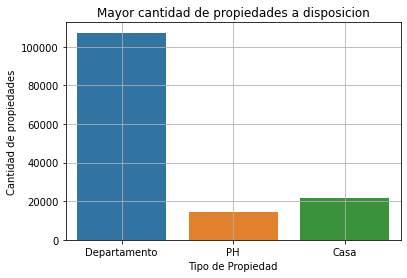

In [9]:
# Ahora si estamos en condiciones de graficar de manera eficiente. 
mayor_cantidad = sns.countplot(x="property_type", data=filtro_1)
plt.title("Mayor cantidad de propiedades a disposicion")
plt.xlabel("Tipo de Propiedad")
plt.ylabel("Cantidad de propiedades")
print("\n*PH: Propiedad Horizontal")
plt.grid()

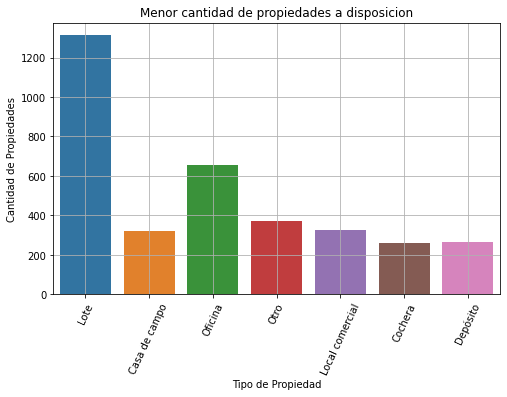

In [10]:
plt.figure(figsize=(8,5))
menor_cantidad = sns.countplot(x="property_type", data=filtro_2)
plt.title("Menor cantidad de propiedades a disposicion")
plt.xlabel("Tipo de Propiedad")
plt.ylabel("Cantidad de Propiedades")
etiqueta_X = plt.xticks(rotation=65)
plt.grid()

In [ ]:
# Los pasos anteriorires fueron utilizadas con el fin de que un grafico no engoble todos los valores ya que quedaria ilegible.
# Por lo que se opto por organizar los datos a traves de dos graficos separados, juntando los grandes volumenes de datos, por un lado
# y por el otro, juntar aquellos valores que no eran muy numerosos dentro del property_type.

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [10]:
# En primer lugar analizamos la columna "l2" para saber cuales son las regiones existentes del dataframe, 
# a la vez que vemos la cantidad por propiedad de la que esta compuesta cada region.
propedata["l3"].value_counts()

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: l3, Length: 89, dtype: int64

In [11]:
# Ahora separamos por zona todas las propiedades de la que estan compuestas, especificamos que por variable 
# contengan todas las localidades correspondientes a cada zona. 
prop_capital, prop_norte, prop_Sur,prop_oeste = propedata.copy(), propedata.copy(),propedata.copy(),propedata.copy()
prop_capital = prop_capital[(prop_capital["l2"]=="Capital Federal")]
prop_norte = prop_norte[(prop_norte["l2"]=="Bs.As. G.B.A. Zona Norte")]
prop_oeste = prop_oeste[(prop_oeste["l2"]=="Bs.As. G.B.A. Zona Oeste")]
prop_Sur = prop_Sur[(prop_Sur["l2"]=="Bs.As. G.B.A. Zona Sur")]

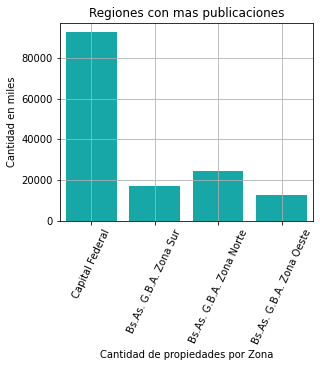

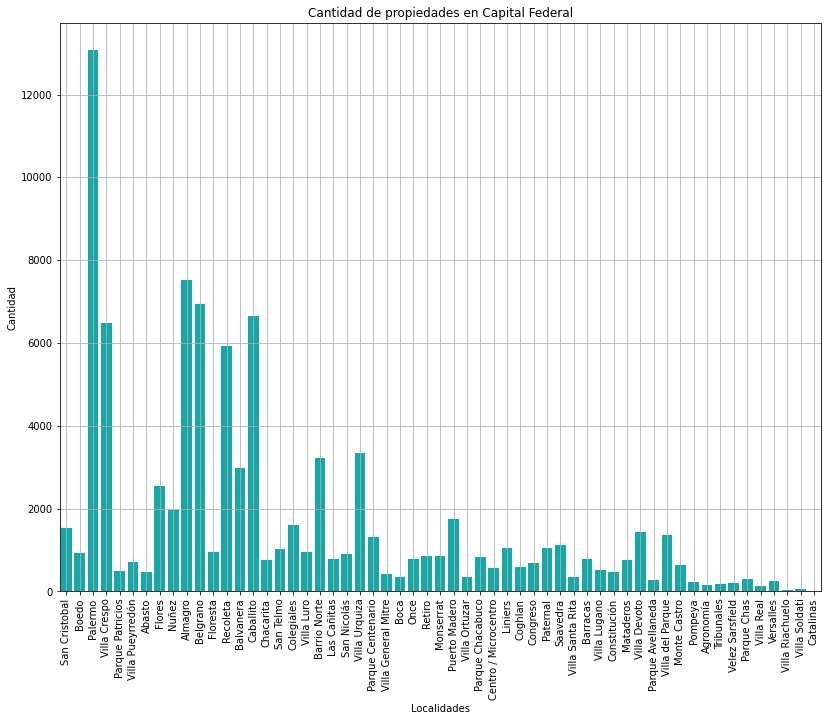

In [12]:
# Ahora si imprimimos en un grafico de barras todas las propiedades publicadas en el dataset (l2)
fig = plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.countplot(x="l2", data=propedata, color="c")
label = plt.xticks(rotation=65)
plt.title("Regiones con mas publicaciones")
plt.ylabel("Cantidad en miles")
plt.xlabel("Cantidad de propiedades por Zona")
plt.grid()
# Y acompañamos a su vez de como estan estan "repartidas" las propiedades por localidad (l3)
# Lo cual se divieron en 4 graficas para que sea mas legible, la primera sera de aquella localidad que contenga mas propiedades.
fig = plt.figure(figsize=(30,23))
plt.subplot(2,2,2)
sns.countplot(x="l3", data=prop_capital, color="c")
label = plt.xticks(rotation=90)
plt.title("Cantidad de propiedades en Capital Federal")
plt.xlabel("Localidades")
plt.ylabel("Cantidad")
plt.grid()
plt.show()

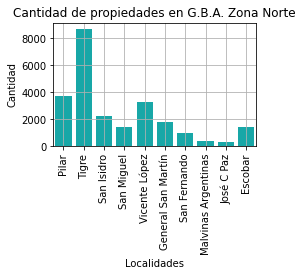

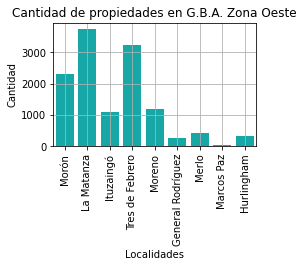

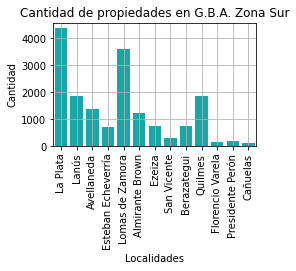

In [13]:
# Las siguientes 3 graficas muestran como se reparten el resto en las distintas zonas menos numerosas en cuanto a propiedades
fig = plt.figure(figsize=(8,5))
plt.subplot(2,2,1)
sns.countplot(x="l3", data=prop_norte, color="c")
label = plt.xticks(rotation=90)
plt.title("Cantidad de propiedades en G.B.A. Zona Norte")
plt.xlabel("Localidades")
plt.ylabel("Cantidad")
plt.grid()
plt.show()

fig = plt.figure(figsize=(8,5))
plt.subplot(2,2,2)
sns.countplot(x="l3", data=prop_oeste, color="c")
label = plt.xticks(rotation=90)
plt.title("Cantidad de propiedades en G.B.A. Zona Oeste")
plt.xlabel("Localidades")
plt.ylabel("Cantidad")
plt.grid()
plt.show()


fig = plt.figure(figsize=(8,5))
plt.subplot(2,2,3)
sns.countplot(x="l3", data=prop_Sur, color="c")
label = plt.xticks(rotation=90)
plt.title("Cantidad de propiedades en G.B.A. Zona Sur")
plt.xlabel("Localidades")
plt.ylabel("Cantidad")
plt.grid()
plt.show()

In [ ]:
# Los pasos anteriorires fueron utilizadas con el fin de que un grafico (l3) no engoble todos los valores ya que quedaria ilegible.

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [3]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO

filter_1 = propedata.copy()
filter_1 = filter_1[(filter_1["l2"]=="Capital Federal")]
filter_1.head()

filter_2 = filter_1.copy()
filter_2 = filter_1[(filter_1['property_type'] == 'Departamento') | (filter_1['property_type'] == 'PH') 
            | (filter_1['property_type'] == 'Casa')] 
filter_2.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [4]:
# En primer lugar, filtraremos el dataframe del punto 5 con las especificaciones exigidas en el notebook,
# creamos un nuevo DataFrame que contengan todos los valores que quedaron sin filtrar
filter_statitics = filter_2[["rooms","bedrooms","bathrooms","surface_total","surface_covered","price","property_type"]]
statitics = (filter_statitics["surface_total"] > 15) & (filter_statitics["surface_total"] < 1000) & filter_statitics["price"] < 4000000
filter_total = pd.DataFrame(filter_statitics[statitics].dropna())
filter_total = filter_total[filter_total.price <= 4000000]
filter_total = filter_total[filter_total.surface_total >= 15]
filter_total = filter_total[filter_total.surface_total <= 1000]
# El nuevo dataframe se denominara "filter_total" y en el mismo solo estaran contenidos los valores exigidos en el punto 6
# y el tipo de propiedad
filter_total.shape

(81019, 7)

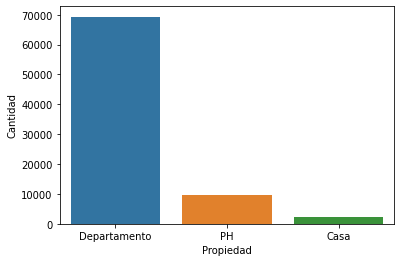

In [5]:
# Contamos cuantas propiedades hay en capital federal en este nuevo dataframe
sns.countplot(data = filter_total, x = "property_type")
plt.xlabel("Propiedad")
plt.ylabel("Cantidad")
plt.show()
# Notamos que los departamentos siguen la logica de ser el tipo de propiedad mas numerosa dentro de la ciudad

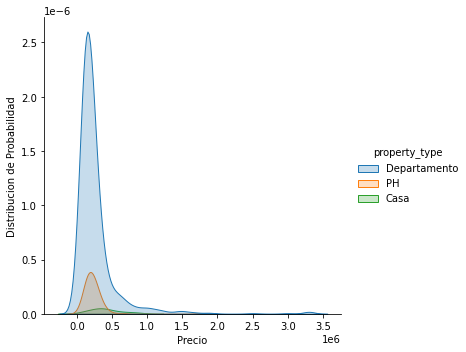

In [6]:
# # Sacamos una muestra de 1000 datos con reposicion y comenzamos el analisis.
s = filter_total.sample(n=1000,random_state=1)
# estudiamos la distribucion los precios según cada propiedad, y vemos que tiene una distribucion normal
sns.displot(s, x="price", hue="property_type", kind="kde", fill=True)
plt.xlabel("Precio")
plt.ylabel("Distribucion de Probabilidad")
plt.show()

In [7]:
# Sacamos los estadisticos mas importantes del Dataframe a travez de la muestra realizada con anterioridad.
print("Media de los atributos:\n", s.mean())
print("Desvío Estandar de los atributos:\n", s.std())

Media de los atributos:
 rooms                   2.992
bedrooms                1.968
bathrooms               1.531
surface_total          96.162
surface_covered        83.882
price              265087.954
dtype: float64
Desvío Estandar de los atributos:
 rooms                   1.371064
bedrooms                1.017847
bathrooms               0.871664
surface_total          88.915948
surface_covered        71.611999
price              324892.797296
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

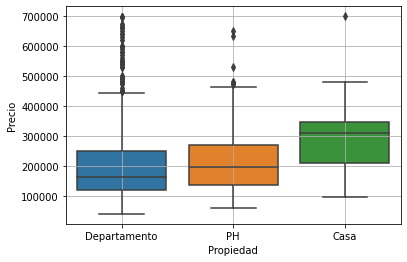

In [9]:
# Con el fin de eliminar los outliers que esten demás en el precio de las propiedades se filtra "price" del DataFrame
# hasta el cuantil 95%.
# Se crea una condicion para ajustar los nuevos datos sin outliers que interfieran en el analisis grafico
Qprice = (filter_total["price"].quantile(0.95))
filter_price = filter_total[(filter_total["price"]) < Qprice]
# Tomamos una muestra de la columna ya filtrada para crear un boxplot y notar el comportamiento de las propiedades respecto 
# al precio.
s_price = filter_price.sample(n=1000,random_state=1)
sns.boxplot(x = "property_type", y = "price", data = s_price)
plt.xlabel("Propiedad")
plt.ylabel("Precio")
plt.grid()
plt.show

In [ ]:
# Notamos la presencia de muchos outliers en "Departamentos", pero no tanto asi en "PH" y "Casa",
# que mas alla de esos datos atipicos, las distribuciones observadas se comportan al igual que la primer grafica de la 
# distribucion de densidad. Por lo tanto se puede intuir que siguen una distribucion normal con respecto al precio.

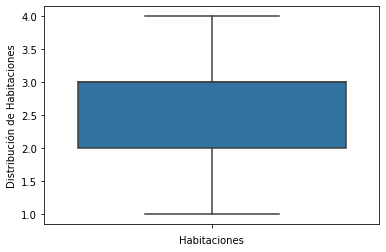

In [87]:
# A fines de que todos los datos esten correctamente delimitados sin los outliers, se procederá a quitarlos dependiendo de
# los atributos.
Qrooms = (filter_total["rooms"].quantile(0.95))
filter_rooms = filter_total[(filter_total["rooms"]) < Qrooms]

s_rooms = filter_rooms.sample(n=1000,random_state=1)
sns.boxplot(y = "rooms", data = s_rooms)
plt.xlabel("Habitaciones")
plt.ylabel("Distribución de Habitaciones")
plt.show()
# Notamos el comportamiento de las habitaciones, y vemos que bien quedo el boxplot sin los outliers notando una correcta
# visualización siendo su distribucion uniforme. 

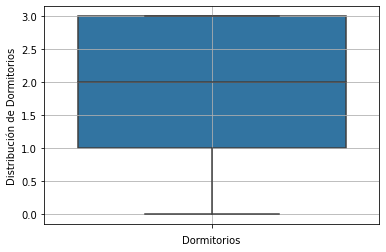

In [24]:
# Ahora visualizamos un boxplot para los Dormitorios.
Qbedrooms = (filter_total["bedrooms"].quantile(0.95))
filter_bedrooms = filter_total[(filter_total["bedrooms"]) < Qbedrooms]

s_bedrooms = filter_bedrooms.sample(n=1000,random_state=1)
sns.boxplot(y = "bedrooms", data = s_bedrooms)
plt.xlabel("Dormitorios")
plt.ylabel("Distribución de Dormitorios")
plt.grid()
plt.show()
# Este se visualiza sin outliers y directamente sin su bigote superior, esto puede deberse a que el limite de deteccion de 
# los valores atipicos estan muy delimitados con la quita del 0.95 restante de los datos. Sin embargo, a travez de la mediana
# puede notarse que es perfectamente simetrico. 

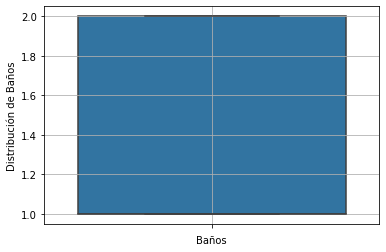

In [27]:
# Vemos que ocurre con los Baños. 
Qbathrooms = (filter_total["bathrooms"].quantile(0.95))
filter_bathrooms = filter_total[(filter_total["bathrooms"]) < Qbathrooms]

s_bathrooms = filter_bathrooms.sample(n=1000,random_state=1)
sns.boxplot(y="bathrooms", data = s_bathrooms)
plt.xlabel("Baños")
plt.ylabel("Distribución de Baños")
plt.grid()
plt.show()

# Este boxplot no tiene mucho sentido perce, sin embargo en la corrección se sugeria realizarlo de todos modos. 
# Este mismo no brinda mucha información con respecto a los datos ya que directamente se sacaron los limites para la 
# deteccion de datos atipicos. Es por eso que no presenta bigotes. 
# Por otro lado tampoco se visualiza la Mediana, por lo tanto no sabemos que tipo de asimetria podria llegar a tener. 

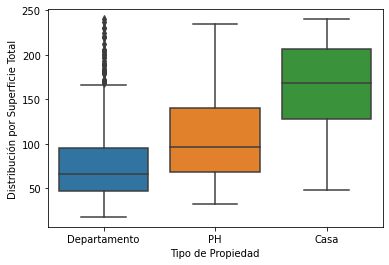

In [89]:
# Ya casi finalizando, vemos que ocurre con las superficies totales respecto a las propiedades.
Qsurface_total = (filter_total["surface_total"].quantile(0.95))
filter_surface_total = filter_total[(filter_total["surface_total"]) < Qsurface_total]

s_surface_total = filter_surface_total.sample(n=1000,random_state=1)
sns.boxplot(x="property_type",y = "surface_total", data = s_surface_total)
plt.xlabel("Tipo de Propiedad")
plt.ylabel("Distribución por Superficie Total")
plt.show()
# Notamos que la distribucion y comportamiento de las propiedades con respecto a las superficies totales es muy uniforme, 
# salvo para Departamento donde aun asi notamos mucha presencia de outliers, sin embargo esta aun es legible y podemos sacar
# alguna conclusion de ella como que es sesgada a la derecha por lo que la mayor cantidad de datos se concentran en esa
# zona del set de datos.
# Para PH y Casa las distribuciones son uniformes, a su vez que para este tipo de propiedades se muestra favorable la quita 
# de outliers a su vez que los valores en cuanto a los limites de valores atipicos difiere un poco pero sin afectar
# la caja en sí. Podemos decir que para PH, la mayor cantidad de datos se encuentra sesgada a la derecha, es decir que el
# mayor volumen de datos son numeros grandes. Por otro lado el volumen de datos para las casas se encuentra equilibrado si
# prestamos atencion a la mediana, no obstante tiene mayores valores atipicos en la parte inferior del set de datos (es decir
# numeros pequeños) que en la parte superior partiendo de la mediana. 

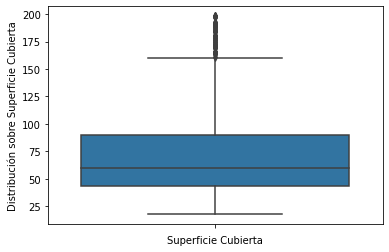

In [28]:
# Por ultimo visualizamos la superficie cubierta sin los outliers mayores a 0.95
Qsurface_covered = (filter_total["surface_covered"].quantile(0.95))
filter_surface_covered = filter_total[(filter_total["surface_covered"]) < Qsurface_covered]

s_surface_covered = filter_surface_covered.sample(n=1000,random_state=1)
sns.boxplot(y = "surface_covered", data = s_surface_covered)
plt.xlabel("Superficie Cubierta")
plt.ylabel("Distribución sobre Superficie Cubierta")
plt.show()
# Notamos una distribucion relativamente uniforme, sin embargo aun con mucha presencia de valores atipicos y outliers 
# en la parte superior de la caja, esto refleja que la mediana este sesgada a la derecha por lo que es correcto pensar
# que el mayor volumen de datos se encuentra en la parte superior del set de datos partiendo desde la mediana.

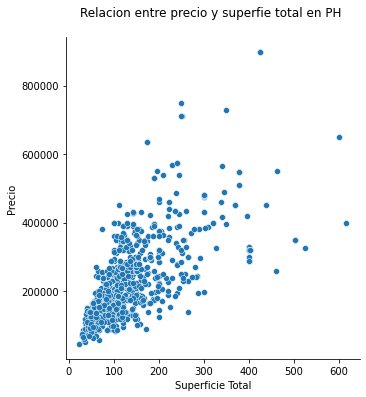

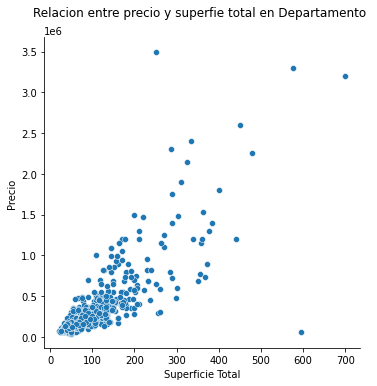

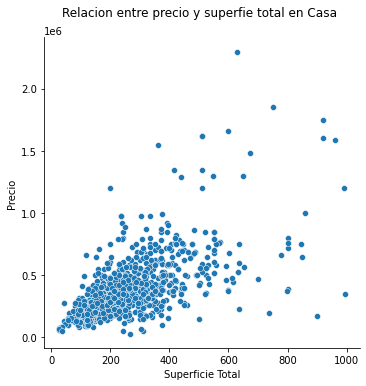

In [17]:
# filtramos nuevamente el Dataframe, ahora crearemos una variable para cada tipo de propiedad que almacenes sus respectivos
# atributos para cada uno.
ph, depto, casa = filter_total[(filter_total["property_type"]=="PH")],filter_total[(filter_total["property_type"]=="Departamento")],filter_total[(filter_total["property_type"]=="Casa")]

# En los tres casos posteriores crearemos variables que almacenen una muestra para cada tipo de propiedad con el fin que al 
# momento de graficar, el grafico respectivo en cada propiedad no quede tan cargado de datos

s_ph= ph.sample(n=1000,random_state=1)
sns.relplot(x="surface_total", y="price", data=s_ph) 
plt.title("Relacion entre precio y superfie total en PH \n")
plt.xlabel("Superficie Total")
plt.ylabel("Precio")

s_depto= depto.sample(n=1000,random_state=1)
sns.relplot(x="surface_total", y="price", data=s_depto) 
plt.title("Relacion entre precio y superfie total en Departamento \n")
plt.xlabel("Superficie Total")
plt.ylabel("Precio")

s_casa= casa.sample(n=1000,random_state=1)
sns.relplot(x="surface_total", y="price", data=s_casa) 
plt.title("Relacion entre precio y superfie total en Casa \n")
plt.xlabel("Superficie Total")
plt.ylabel("Precio")

plt.show()

# Conclusión: En los tres tipos de propiedad, se puede ver que hay una relacion entre el precio y la superficie total,
# donde aquellas en donde el precio es mas barato, le corresponde una superficie total mas pequeña.
# Por otro lado, a medida que el precio y la superficie total sube, pierden relacion. Esto puede deberse a factores como
# que el precio de propiedad no depedenda unicamente la superficie total sino de otros factores como la cantidad de 
# cuartos, habitaciones o baños, como asi tambien la localizacion del inmueble.

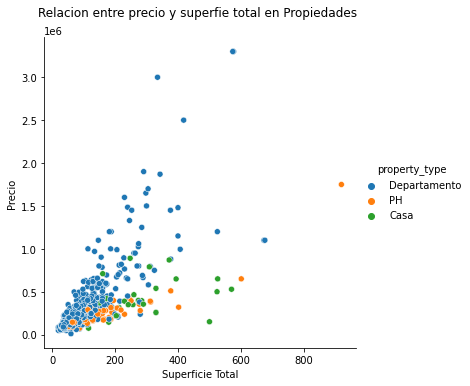

In [25]:
# Ahora lo visualizamos con la muestra general "s" y vemos que el comportamiento es similar (sino igual) en cuanto al 
# al precio y la superficie total. Lo visualizamos con las tres propiedades juntas.
sns.relplot(x="surface_total", y="price", hue= "property_type",data=s) 
plt.title("Relacion entre precio y superfie total en Propiedades \n")
plt.xlabel("Superficie Total")
plt.ylabel("Precio")

plt.show()

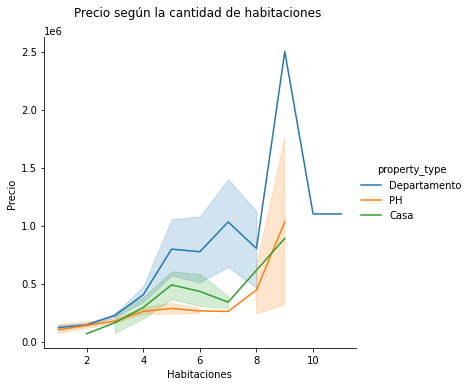

In [20]:
# Ahora veremos la realcion entre la cantidad de habitaciones y el precio con respecto a las distintas propiedades.
# Haremos un relplot utilizando la muestra "s" que es la muestra general y que utilizaremos por defecto
# en el resto del analisis.
sns.relplot(x= "rooms", y="price", hue="property_type", kind="line", data= s)
plt.title("Precio según la cantidad de habitaciones \n")
plt.xlabel("Habitaciones")
plt.ylabel("Precio")

plt.show()
# Notamos que a medida que sube la cantidad de habitaciones el precio tambien lo hace, y es mas significativo en 
# Departamentos.

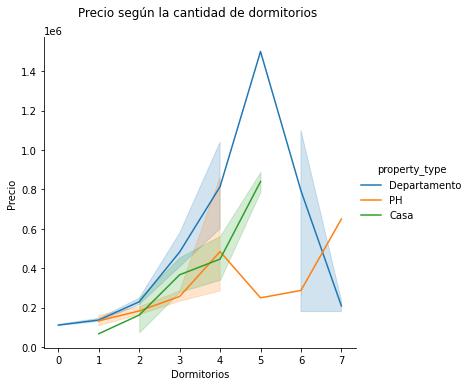

In [21]:
# Ahora veremos la realcion entre la cantidad de dormitorios y el precio con respecto a las distintas propiedades.
sns.relplot(x= "bedrooms", y="price", hue="property_type", kind="line", data= s)
plt.title("Precio según la cantidad de dormitorios \n")
plt.xlabel("Dormitorios")
plt.ylabel("Precio")

plt.show()
# Notamos al igual que en las habitaciones, los dormitorios tienden a tener un comportamiento creciente en cuanto al 
# precio y los dormitorios, sin embargo el precio cae en departamentos cuando la cantidad supera los cinco dormitorios.
# Sin embargo este ultimo comportamiento del dormitorio en departamentos puede que se deba a un error en el set de datos o 
# factores ajenos como lo fue en la correlacion de "surface_total" y "price" como la localizacion por ejemplo.

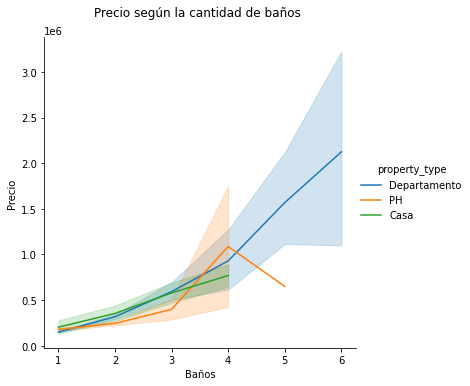

In [90]:
# Por ultimo, visualizaremos la relacion entre el precio y los baños que hay entre cada propiedad.
sns.relplot(x= "bathrooms", y="price", hue="property_type", kind="line", data= s)
plt.title("Precio según la cantidad de baños \n")
plt.xlabel("Baños")
plt.ylabel("Precio")

plt.show()
# Notamos que el comportamiento al igual que en dormitorios y habitaciones es similar, creciente en precio y baños. 
# Vemos igualmente que a partir de los cuatro baños en PH, el precio comienza a bajar, y como explicamos anteriormente,
# puede deberse a factores ajenos al analisis presente. 

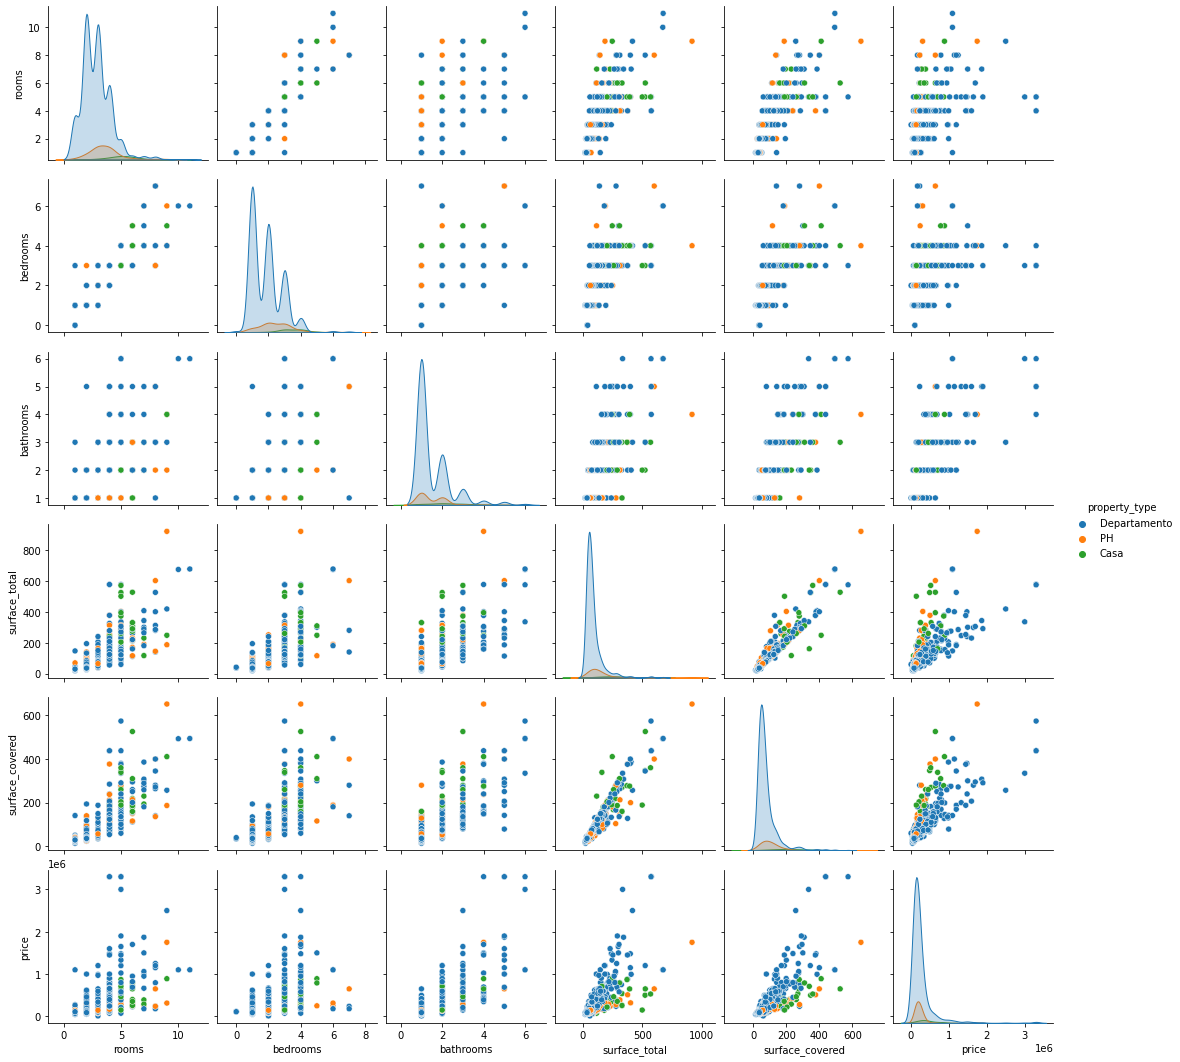

In [28]:
# Finalizando, visualizamos un pairplot de todo el DataFrame a travez de la muestra "s", y que fue exigida en el punto 6.
# Lo hicimos en funcion de los distintos atributos con las respectivas propiedades. El fin mismo de esta visualizacion es
# presentar los datos de manera general y ver que datos tienen mas relacion que otros. 
# Esto será una antesala de la correlacion propuesta en el punto 7.

sns.pairplot(s, hue="property_type", height=2.5)
plt.show()

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

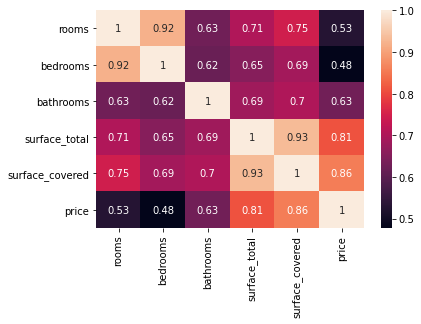

In [13]:
# Correlacion con el tipo de propiedad Departamento.
sns.heatmap(s_depto.corr(), annot = True)
plt.show()

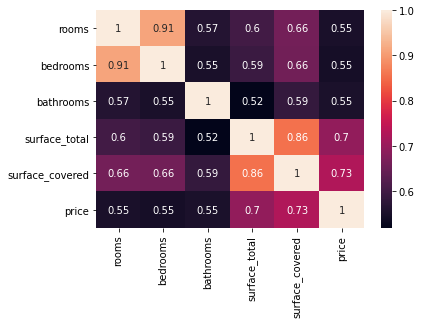

In [89]:
# Correlacion con el tipo de propiedad Propiedad Horizontal.
sns.heatmap(s_ph.corr(), annot = True)
plt.show()

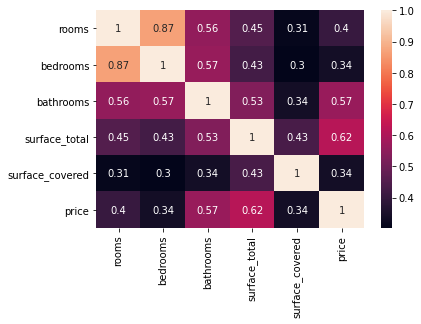

In [90]:
# Correlacion con el tipo de propiedad Casa.
sns.heatmap(s_casa.corr(), annot = True)
plt.show()

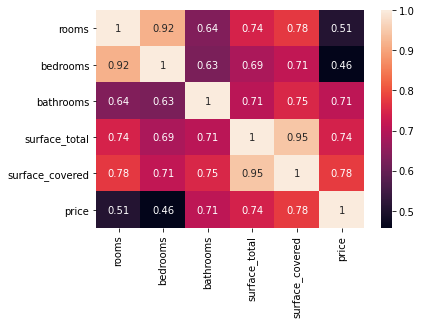

In [91]:
# Correlacion General del Dataframe.
sns.heatmap(s.corr(), annot = True)
plt.show()

In [ ]:
# Conclusión: 
# Las mejores variables para poder predecir el precio serán, siguiendo la correlación: "surface_total", 
# "surface_covered", y "bathrooms", que esta ultima si bien fue debil en correlacion a los precios puntualmente cuando analizamos
# por cada propiedad, en la correlacion general se muestra una fuerte correlacion con los precios con un total de 71 %.

In [ ]:
# Diferencias: Generalmente el comportamiento de los tipos de propiedad son similares, salvo en la correlacion que hay con los "rooms"
# en cada propiedad, donde se aprecia que dependiendo la propiedad, la relacion con el precio sube levemente en Departamentos, se 
# mantiene constante en los PH y baja bastante en Casas.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


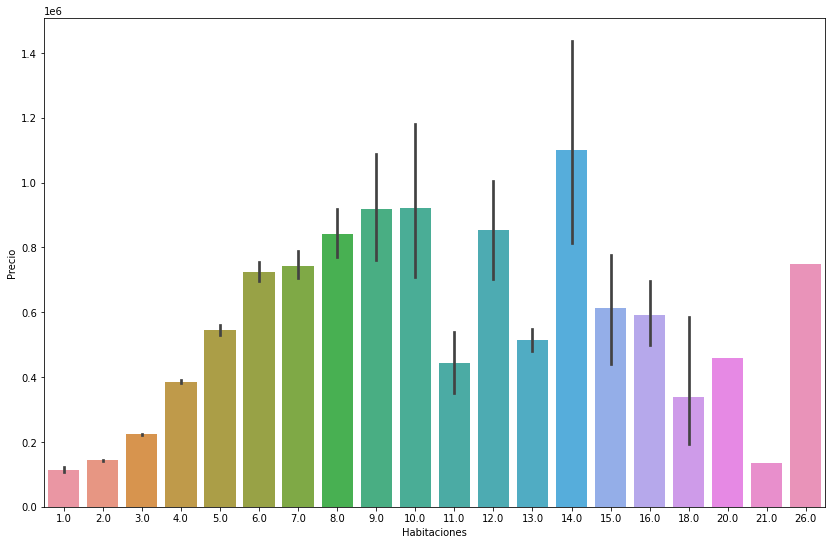

In [86]:
#Graficamos la relacion entre el precio y la cantidad de cuartos que hay por propiedad.
fig = plt.figure(figsize=(14,9))
sns.barplot(x="rooms", y="price", data=filter_2)
plt.xlabel("Habitaciones")
plt.ylabel("Precio")
plt.show()
# Notamos que no necesariamente la propiedad con mas cuartos disponibles sea la mas cara.

In [8]:
# A partir de una mascara solo visualizaremos los valores comprendidos entre 14 a 26 cuartos por propiedad y donde estan localizados.
# elegimos 14 porque es la mas cara segun su cantidad de cuartos, y 26 por ser la maxima cantidad de cuartos por propiedad.
mascara = np.logical_and(filter_2.rooms >= 14, filter_2.rooms <= 26)
filter_2[mascara].shape

(27, 19)

In [88]:
# Visualizamos cuales son las propiedades con la cantidad de cuartos correspondientes y donde estan localizados 
visual_property = filter_2[["rooms","property_type","l3","price"]]
print(visual_property[visual_property.rooms == 26])
print(visual_property[visual_property.rooms == 14])
# Vemos que las que tienen mas cuartos por propiedad estan en la Boca y son exclusivamente Casas.
# Por otro lado, las que contienen 14 cuartos estan localizadas en su mayoria en Recoleta siendo los mismos departamentos.

        rooms property_type    l3     price
31583    26.0          Casa  Boca  750000.0
111651   26.0          Casa  Boca  750000.0
       rooms property_type             l3      price
5154    14.0  Departamento       Recoleta  1150000.0
38979   14.0  Departamento       Recoleta   950000.0
53645   14.0  Departamento         Retiro  1600000.0
69100   14.0            PH  San Cristobal   700000.0


In [ ]:
# Como conclusion, se puede decir que lo importante en cuanto a los precios es la localizacion y no tanto las prestaciones. 
# Sin embargo, si tendría que utilizar informacion externa a este dataset seria el estado de los barrios y nivel de criminalidad 
# que hay en la zona donde se encuentren las propiedades a mejores precios y con mayores prestaciones. 

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [32]:
# Creamos un nuevo dataframe con los atributos que son necesarios para el analisis. En este caso sacamos las propiedades.
ML_data = pd.DataFrame(filter_total.drop(["property_type"], axis=1))

In [33]:
# Definimos el vector en el cual contiene las variables predictorias: Como aclaramos en la correlacion, utilizaremos 
# las superficies totales y los baños, no utilizaremos "surface_covered" ya que es una variable que se comporta de forma
# similar a "surface_total". Ademas, como vimos en la correlacion de los baños, si bien fue debil analizando puntualmente
# por propiedad, en la correlación general tuvo una correlacion bastante alta en relación al precio.

X = ML_data[["surface_covered","bathrooms"]]
X.shape

(81019, 2)

In [34]:
# La variable a predecir sera "price".
y = ML_data.price

In [35]:
# Ahora divimos en dos el set de datos, por un lado las variables de entranamiento y por otro las de test.
# Las de entrenamiento contendran el 70 % de los datos mientras que la del test el restante 30 %.
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 2) (56713,) (24306, 2) (24306,)


In [56]:
# Si prestamos atencion al dataset, nos daremos cuenta que dentro del aprendizaje supervisado, este tiene las caracteristicas
# de ser un problema que podria resolverse con regresion. Por lo que importaremos dentro de la libreria de Scikit Learn
# las herramientas de regresion el cual utilizaremos en el posterior analizis.
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [57]:
# Usaremos la raiz del error cuadratico medio, el cual mide la cantidad de error que hay entre dos conjuntos de datos. 
# En otras palabras, compara un valor predicho y un valor observado o conocido.
# A su vez usaremos esta metrica ya que nos facilita una correcta evaluacion segun este tipo de dataset, el cual como ya 
# mencionamos antes, plantea dentro del aprendizaje supervizado un problema de regresión.  
from sklearn.metrics import mean_squared_error

In [ ]:
# Un primer paso fundamental es ver que tal se comportarian nuestros modelos si elegimos previamente cual seria el
# hiperparametro mas adecuado. Entonces a continuación analizaremos la metrica RMSE dandole ciertos hiperparametros
# con el fin de tener un primer vistazo de como pueden llegar a comportarse nuestros modelos.
# Fundamentalmente aquí hay que visualizar donde podria estar el Goldilocks Zone para ambos modelos, que seria la zona entre
# un sesgo alto (underfitting) y una varianza alta (overfitting). 
# Los modelos utilizados para este set de datos serán: Arboles de decision y Vecinos Mas cercados.

In [58]:
# Árbol de decisión 

# En primer lugar planteamos un lista "tree_depth" el cual esta compuesta por diferentes valores que puede tomar la metrica, 
# a fines obviamente de analizar el modelo. 

Lista_train_tree = []
Lista_test_tree = []

tree_depth = [1,2,3,4,5,6,7,8,9,10,15,20,25,30]

# A continuación, lo entrenamos y utilizamos el RMSE. 

for depth in tree_depth:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    
    tree.fit(X_train,y_train)
    
    y_train_pred = tree.predict(X_train)
    rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    y_test_pred = tree.predict(X_test)
    rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    Lista_train_tree.append(rmse_train_tree)
    Lista_test_tree.append(rmse_test_tree)

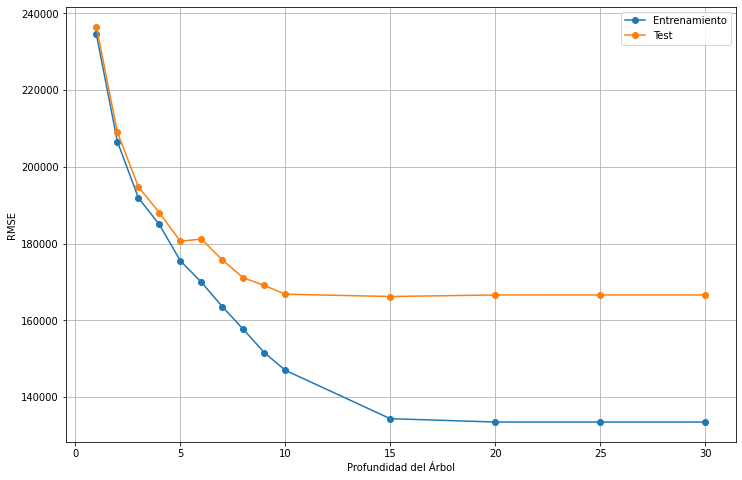

In [59]:
# Ahora visualizamos que tan bien se comporto el modelo a travez de los hiperparametros que le dimos. 
plt.figure(figsize=(12,8))
plt.plot(tree_depth,Lista_train_tree,"o-",label="Entrenamiento")
plt.plot(tree_depth,Lista_test_tree,"o-",label="Test")
plt.legend()
plt.xlabel("Profundidad del Árbol")
plt.ylabel("RMSE")
plt.grid()
plt.show()

In [ ]:
# Notamos que a partir de que la profundidad del arbol tiene el valor 2, el test y el train comienzan 
# a separarse pero dentro de valores razonables, sin embargo con una profundidad 5 el modelo comienza a sobreajustarse 
# por lo que para el valor 6 esto ya es evidente. 

In [70]:
# K Vecinos más cercanos 

# Para KNN, planteamos un lista "k_vecinos" el cual esta compuesta por diferentes valores que puede tomar la metrica, 
# a fines obviamente de analizar el modelo. 


Lista_train_knn = []
Lista_test_knn = []

k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30]

# A continuación, lo entrenamos y utilizamos el RMSE.

for k in k_vecinos:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    knn.fit(X_train,y_train)
    
    y_train_pred = knn.predict(X_train)
    rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    y_test_pred = knn.predict(X_test)
    rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    Lista_train_knn.append(rmse_train_knn)
    Lista_test_knn.append(rmse_test_knn)

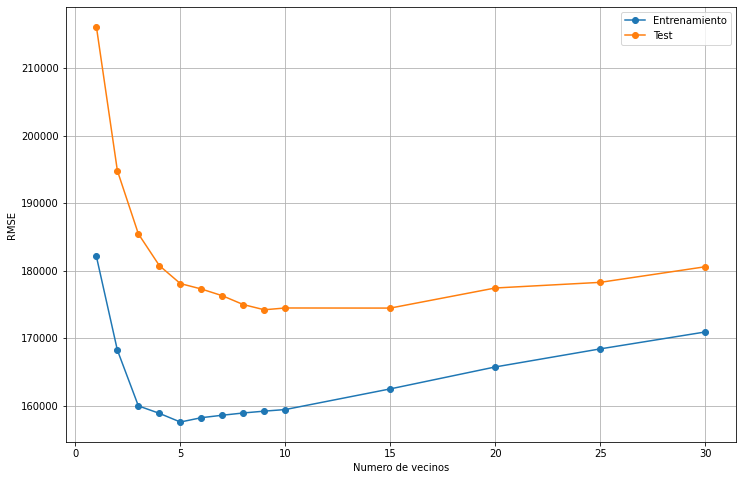

In [71]:
# Ahora visualizamos que tan bien se comporto el modelo a travez de los hiperparametros que le dimos. 
plt.figure(figsize=(12,8))
plt.plot(k_vecinos,Lista_train_knn,"o-",label="Entrenamiento")
plt.plot(k_vecinos,Lista_test_knn,"o-",label="Test")
plt.legend()
plt.xlabel("Numero de vecinos")
plt.ylabel("RMSE")
plt.grid()
plt.show()

In [ ]:
# Por otro lado vemos que para KNN, la cantidad optima de vecinos podria ser el 5 ya que para ese punto el modelo
# deja de sobreajustarse a su vez que no hay overfitting con menor error.

In [ ]:
# Una vez estudiado los hiperparametros mas optimos para nuestros modelos, es momento de seleccionar los hiperpametros 
# para comenzar a analizar cual es el que mejor se adecua a nuestras necesidades de predicción.

In [80]:
#BENCHMARK: utilizaremos como modelo base un modelo de regresion para comparar posteriormente con los demas modelos restantes.
linear_model = LinearRegression()

# Para el siguiente analisis, se da por sentado que los modelos tendran el mejor desempeño posible una vez analizados con
# anterioridad el RMSE viendo que hiperparametros eran los mas optimos.

# Para arboles de decision le asignaremos el valor 5 el cual, como visualizamos anteriormente, es el valor del cual el 
# modelo comienza a sobreajustarse. 
tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)

# Y para el modelo de vecinos mas cercanos, utilizaremos el valor 5 por razones ya explicadas anteriormente.
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [81]:
# Ahora es momento de entrenar los modelos con los hiperparametros seleccionados.
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [82]:
# Es momento de visualizar los resultados de los modelos que hemos entrenado y compararlos con los de test, 
# comenzando con el BENCHMARK elegido, el de Regresión.
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Modelo: Regresión Lineal')
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Modelo: Regresión Lineal
Raíz del error cuadrático medio en Train: 224663.3332314654
Raíz del error cuadrático medio en Test: 233239.5190616432


In [83]:
# Ahora lo haremos con el modelo de Arbol de Desición

y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)
    

rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Modelo: Árbol de Desición')
print(f'Raíz del error cuadrático medio en Train: {rmse_train_tree}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_tree}')

Modelo: Árbol de Desición
Raíz del error cuadrático medio en Train: 175486.80591739502
Raíz del error cuadrático medio en Test: 180585.2674907496


In [84]:
# Y por ultimo es turno de KNN o K Vecinos más cercanos:
y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)
    

rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Modelo: Vecinos más cercanos')
print(f'Raíz del error cuadrático medio en Train: {rmse_train_knn}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_knn}')


Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 157551.48219846885
Raíz del error cuadrático medio en Test: 178065.88671845474


In [57]:
# Visualizamos que el RMSE es muy elevado en los tres modelos, tanto en las variables entrenamiento como de las test.
# Esto puede deberse a problemas en cuanto al set de datos respecta, la forma en que se cargo los datos de cada columna,
# y quiza tambien por datos faltantes o erroneos.
# Sin embargo, lo importante es que el comportamiento es medianamente aceptable para poder sacar concluciones a la hora 
# de probar el score de cada modelo. 

# Un primer vistaso es observar el RMSE del train con respecto al test, donde los valores mas bajos se presentaron en el 
# el modelo de vecinos mas cercanos. Esto podria ser un guiño a cual será el mejor modelo predictorio.

In [ ]:
# Ahora probamos el SCORE para cada modelo y veremos cual fue el modelo que mejor se adecuo a nuestra exigencia.

In [69]:
linear_model.score(X_train,y_train)

0.4297272407292504

In [85]:
tree_regressor.score(X_train,y_train)

0.6520577485547769

In [86]:
knn_regressor.score(X_train,y_train)

0.7195449805743215

In [58]:
# Una vez visto los resultados para cada modelo en cuanto al SCORE, efectivamente, y como se visualizo en RMSE, el mejor
# modelo para predecir el precio fue el de Vecinos Mas Cercanos ya que tuvo una efectividad del 0.72 (redondeado). Con
# respecto a los demas podemos ver que para Arboles de decision fue de 0.65 y en cuanto al benchmark fue de 0.43.

In [ ]:
# Metodología: A partir del posterior analisis realizado, hay igual una serie de puntos de los cuales queria acotar. Por 
# un lado, a lo largo del data set encontre una escalada de grises en cuanto a la cantidad de valores erroneos que supone
# hay entre superficies totales y cubiertas. De vez en cuando encontraba cubiertas mas altas que las totales y eso por logica
# no corresponde. Por otro lado creo que las propiedades hubieran facilitado un poco mas la mejor prediccion al precio ya que,
# como analice en el desafio, no solo las mejores prestaciones se refleja en el precio si no que sus ubicaciones tambien lo hacen. 
# Por lo tanto, podria decirse que para el siguiente proyecto, aun carezco de ciertas herramientas analiticas que iré 
# supliendo a lo largo de la carrera, y que tengo como conclusion que este set de datos se le puede sacor aún mas provecho 
# del que yo le saque aun con mis falencias.

In [ ]:
# Conclusion Final: Como hemos analizado a lo largo del Proyecto 1, vimos que los parametros tanto de la superficie 
# total y aunque no lo parezca, los baños, han sido los mas oportunos para asesorar a un tasador a colocar un precio a la
# propiedad. Por otro lado vimos que el mejor modelo de Machine Learning es Vecinos Mas Cercanos para predecir los precios
# con relacion a la superficie. 

In [69]:
# Por ultimo, para corrobar que se uso un DataFrame correcto, lo imprimimos junto a un shape con las especificaciones 
# que nos pide el notebook:
ML_data.shape

(81019, 6)